# Data Visualization Project on Ligue 1 Current Players

## 1. Read Essential Libraries

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

## 2. Analyzing data using the method we used on Premier League

In [17]:
Ligue1=pd.read_csv('Ligue 1 Transfermarkt.csv')

## 3. Data Visualization

#### 10 Most Valuable Player

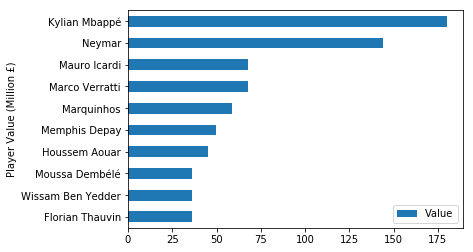

In [18]:
Top10Player = Ligue1.sort_values('Value',ascending = False).iloc[:10][['Player','Value']].plot.barh('Player','Value')
Top10Player.invert_yaxis()
plt.ylabel('Player Value (Million £)')
plt.show()

#### How many countries have Ligue1 players

In [19]:
print('Players come from '+str(len(Ligue1.groupby('Citizenship')))+' Countries')

Players come from 65 Countries


#### Foreign Players Origin Top 10

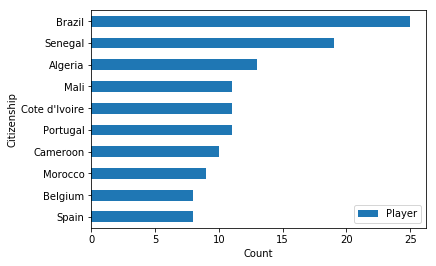

In [20]:
CitizenshipCount = Ligue1.groupby('Citizenship')[['Player']].count().sort_values('Player',ascending = False)[1:11].plot.barh()
CitizenshipCount.invert_yaxis()
plt.xlabel('Count')
plt.show()

#### Players Age Distribution

In [21]:
Ligue1.Age.describe()

count    544.000000
mean      24.821691
std        4.644588
min       16.000000
25%       21.000000
50%       24.000000
75%       28.000000
max       42.000000
Name: Age, dtype: float64

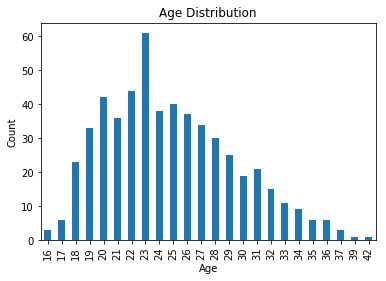

In [22]:
Ligue1.groupby('Age')['Player'].count().plot.bar()
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#### Team Total Value

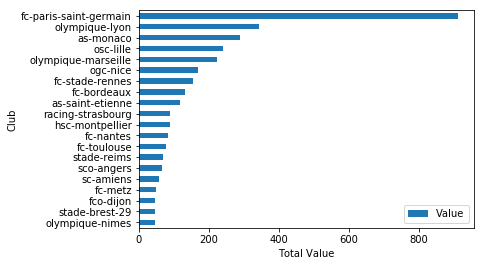

In [23]:
ClubValue = Ligue1.groupby('Club')[['Value']].sum().sort_values('Value',ascending = False).plot.barh()
ClubValue.invert_yaxis()
plt.xlabel('Total Value')
plt.show()